In [178]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [179]:
import sklearn as sl

# 1. import `train_test_split`

In [180]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 2. select `dataframe` or create

In [181]:
# creating data or dicitonary
sample_data = {
    'name':['alok','rahul','rohit','ashish','avinash','nehaN','nehaR','aarul'],
    'marks':[33,44,55,66,77,88,96,99],
    'salary':[3,4,5,6,7,8,9,10]
}
sample_data

{'name': ['alok',
  'rahul',
  'rohit',
  'ashish',
  'avinash',
  'nehaN',
  'nehaR',
  'aarul'],
 'marks': [33, 44, 55, 66, 77, 88, 96, 99],
 'salary': [3, 4, 5, 6, 7, 8, 9, 10]}

In [182]:
# 3. Changing data into 'dataframe'
df = pd.DataFrame(sample_data)
df

,name,marks,salary
0,alok,33,3
1,rahul,44,4
2,rohit,55,5
3,ashish,66,6
4,avinash,77,7
5,nehaN,88,8
6,nehaR,96,9
7,aarul,99,10


In [183]:
x = df[['marks']]
x

,marks
0,33
1,44
2,55
3,66
4,77
5,88
6,96
7,99


In [184]:
y = df['salary']
y

0     3
1     4
2     5
3     6
4     7
5     8
6     9
7    10
Name: salary, dtype: int64

In [185]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [186]:
testing_x = x_test

In [187]:
training_x = x_train

In [188]:
testing_y = y_test

In [189]:
training_y = y_train

In [190]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='marks', ylabel='salary'>

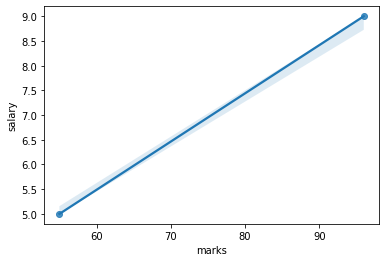

In [191]:
sns.regplot(x=testing_x,y=testing_y)

In [192]:
from sklearn import linear_model

In [193]:
reg = linear_model.LinearRegression()

In [194]:
reg.fit(x_train,y_train)

LinearRegression()

In [195]:
reg.predict([[66]])

c:\Users\noopu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.14906832])

In [196]:
reg.coef_

array([0.10050819])

In [197]:
reg.intercept_

-0.48447204968944035

In [198]:
(reg.coef_*66)+reg.intercept_

array([6.14906832])

In [199]:
import pandas as pd


In [200]:
df['newCol'] = ""
df

,name,marks,salary,newCol
0,alok,33,3,
1,rahul,44,4,
2,rohit,55,5,
3,ashish,66,6,
4,avinash,77,7,
5,nehaN,88,8,
6,nehaR,96,9,
7,aarul,99,10,


In [201]:
df.loc[df['marks']>=88,"newCol"] = "good"
df.loc[df['marks']<88,"newCol"] = "bad"
df

,name,marks,salary,newCol
0,alok,33,3,bad
1,rahul,44,4,bad
2,rohit,55,5,bad
3,ashish,66,6,bad
4,avinash,77,7,bad
5,nehaN,88,8,good
6,nehaR,96,9,good
7,aarul,99,10,good


In [202]:
# uses OneHotEncoder to change the string bad and good in newCol to assign numberical value
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [203]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [204]:
ohe_T = ohe.fit_transform(df[['newCol']])
ohe_T

,newCol_bad,newCol_good
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0


In [205]:
df

,name,marks,salary,newCol
0,alok,33,3,bad
1,rahul,44,4,bad
2,rohit,55,5,bad
3,ashish,66,6,bad
4,avinash,77,7,bad
5,nehaN,88,8,good
6,nehaR,96,9,good
7,aarul,99,10,good


# preprocessing data

In [206]:
bins = (2,66,99)
group_names = ['bad','good']
df['marks'] = pd.cut(df['marks'],bins=bins,labels=group_names)
df['marks'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [207]:
df

,name,marks,salary,newCol
0,alok,bad,3,bad
1,rahul,bad,4,bad
2,rohit,bad,5,bad
3,ashish,bad,6,bad
4,avinash,good,7,bad
5,nehaN,good,8,good
6,nehaR,good,9,good
7,aarul,good,10,good
